In [1]:
# Источник датасета: https://www.kaggle.com/sachinprabhu007/amazon-ml-engineer-hiring-challenge

In [2]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas
#!pip install sklearn
#!pip install seaborn

In [3]:
#!pip list

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv('task.csv', sep=';')

In [6]:
df

,id,visit_score,product_search_score,ctr_score,stay_score,frequency_score,product_variation_score,order_score,affinity_score,customer_active_segment,X1
0,1,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
1,2,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
2,3,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
3,4,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
4,5,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA
...,...,...,...,...,...,...,...,...,...,...,...
7155,7156,18.164300,7.240835,-0.056238,-0.177289,0.336608,4.043067,4.758199,68.052717,C,AA
7156,7157,25.363705,4.881059,0.038720,0.054397,2.452571,7.582251,1.823892,2.080245,C,BA
7157,7158,11.160720,5.019859,0.053864,-0.102337,4.968183,8.585355,2.422193,0.616082,C,BA
7158,7159,17.140020,9.269037,0.059911,-0.004299,0.357399,4.193971,3.715392,26.939493,C,BA


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7160 non-null   int64  
 1   visit_score              7160 non-null   float64
 2   product_search_score     7131 non-null   float64
 3   ctr_score                7160 non-null   float64
 4   stay_score               7144 non-null   float64
 5   frequency_score          7160 non-null   float64
 6   product_variation_score  7117 non-null   float64
 7   order_score              7119 non-null   float64
 8   affinity_score           7160 non-null   float64
 9   customer_active_segment  7148 non-null   object 
 10  X1                       7135 non-null   object 
dtypes: float64(8), int64(1), object(2)
memory usage: 615.4+ KB


In [8]:
df.describe()

,id,visit_score,product_search_score,ctr_score,stay_score,frequency_score,product_variation_score,order_score,affinity_score
count,7160.000000,7160.000000,7131.000000,7160.000000,7144.000000,7160.000000,7117.000000,7119.000000,7160.000000
mean,3580.500000,19.700385,5.385970,0.111038,0.202822,1.885588,5.444226,3.309440,19.889035
std,2067.058296,6.980932,1.779850,0.260733,0.886824,4.967213,2.336244,1.060144,20.783679
min,1.000000,1.248385,-0.113791,-0.615134,-0.381836,0.022957,2.718819,0.620935,-0.501215
25%,1790.750000,14.250243,4.146965,0.005032,-0.033382,0.282119,4.099106,2.645399,6.910150
50%,3580.500000,19.256051,5.358104,0.063178,0.024508,0.457636,4.669433,3.254096,14.630477
75%,5370.250000,24.756843,6.579949,0.135072,0.130086,0.822750,5.665742,3.875797,26.102862
max,7160.000000,42.960500,13.678108,2.528584,13.533233,49.683739,19.095799,11.388305,257.251810


In [9]:
# Мы видим, что изначальный датасет имеет 7160 элементов (строк) и 11 показателей. Данные состоят из 8 показателей типа 
# вещественные числа и 2-х категориальных показателей. Первый столбец id не несёт для нас никакую существенную информативность
# для анализа данных, поэтому в дальнейшем он будет удален из базы. При первичном анализе относительно статистических данных 
# в некоторых параметрах присутствуют пропущенные значения и выбросы. Поэтому далее будет проведена работа по исправлению этих
# ошибок с целью преобразования данных в более удобную форму для построения регрессии. 

In [10]:
df = df.drop(['id'], axis='columns', inplace=False)
df.head(5)

,visit_score,product_search_score,ctr_score,stay_score,frequency_score,product_variation_score,order_score,affinity_score,customer_active_segment,X1
0,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
1,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
2,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
3,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
4,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA


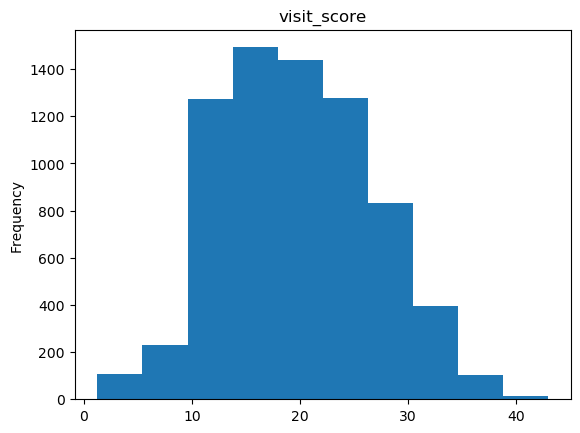

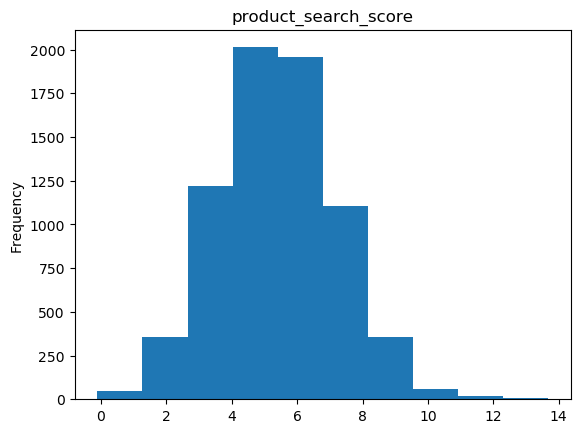

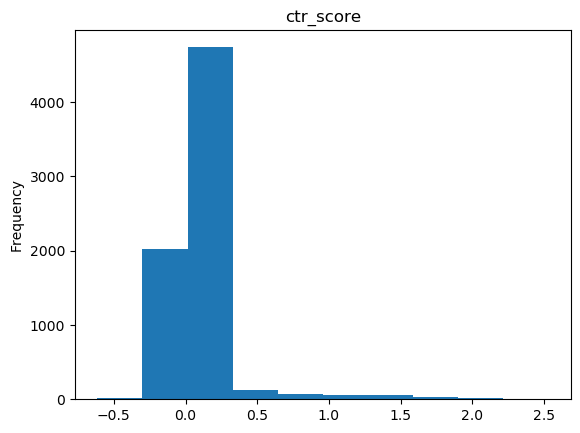

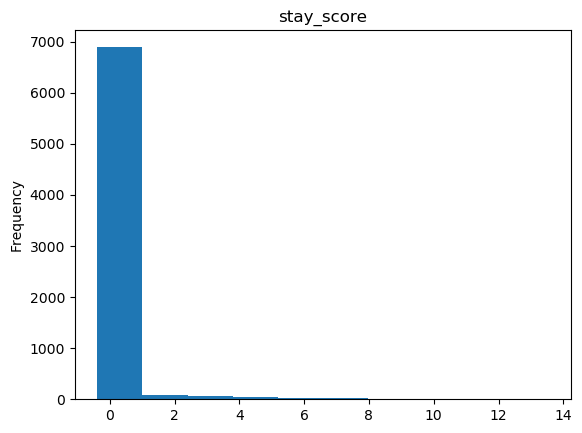

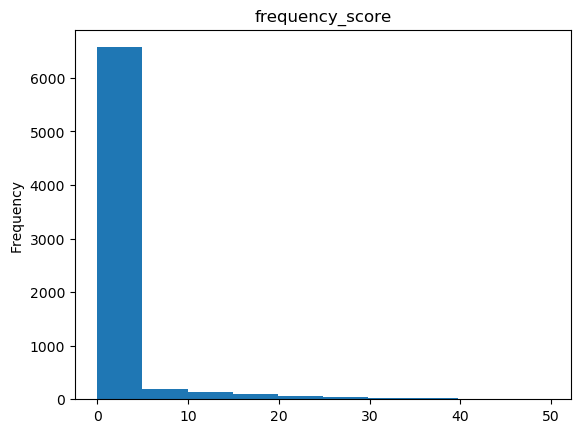

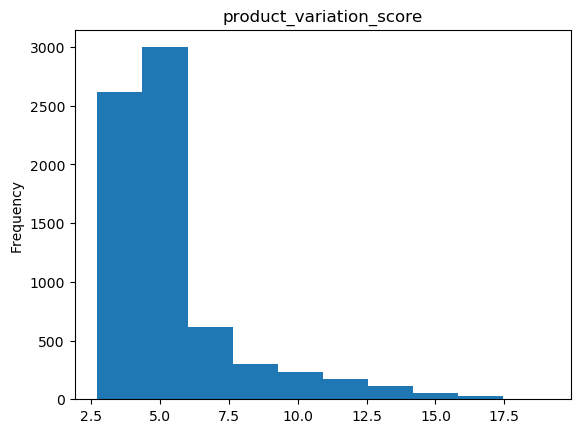

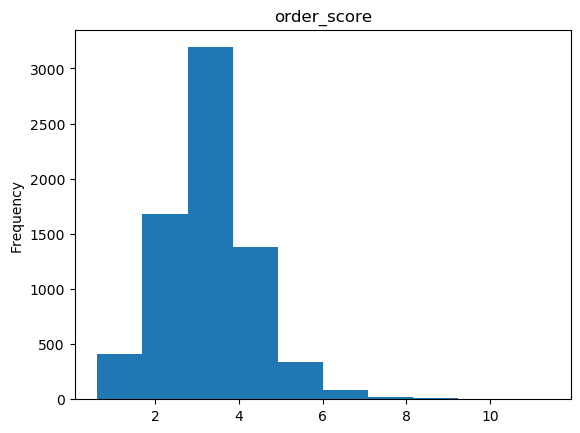

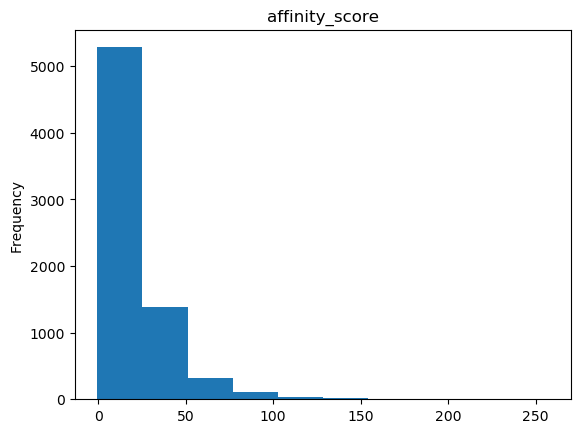

In [11]:
df['visit_score'].plot(kind = 'hist')
plt.title('visit_score')
plt.show()
df['product_search_score'].plot(kind = 'hist')
plt.title('product_search_score')
plt.show()
df['ctr_score'].plot(kind = 'hist')
plt.title('ctr_score')
plt.show()
df['stay_score'].plot(kind = 'hist')
plt.title('stay_score')
plt.show()
df['frequency_score'].plot(kind = 'hist')
plt.title('frequency_score')
plt.show()
df['product_variation_score'].plot(kind = 'hist')
plt.title('product_variation_score')
plt.show()
df['order_score'].plot(kind = 'hist')
plt.title('order_score')
plt.show()
df['affinity_score'].plot(kind = 'hist')
plt.title('affinity_score')
plt.show()

In [12]:
# Графики парарметров visit_score, product_search_score, order_score подобны нормальному распределению, и это является 
# хорошим показателем. Что касаемо остальных парарметров, на их графиках прослеживаются выбросы в виде хвостов, а основная 
# часть данных сконцентрирована у начала координат. Следовательно, во избежание искажений результатов регрессии нам 
# необходимо прологарифмировать эти данные. Эта операция будет проведена на следующих этапах работы.

In [13]:
# Filling NA 

In [14]:
df.isnull().sum()

visit_score                 0
product_search_score       29
ctr_score                   0
stay_score                 16
frequency_score             0
product_variation_score    43
order_score                41
affinity_score              0
customer_active_segment    12
X1                         25
dtype: int64

In [15]:
# Как видим, в 6-и переменных присудствуют пропуски, две из которых имеют качественный тип данных.
# Следует избавиться от этих пропусков.

In [16]:
def fill_missing_num(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)

In [17]:
def fill_missing_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:        
        prep_fr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        prep_fr.fit(x[char_var])
        x[char_var] = prep_fr.transform(x[char_var])
    return(x)

In [18]:
from sklearn.impute import SimpleImputer
df = fill_missing_num(df)
df = fill_missing_char(df)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/impute/_base.py:356: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  row_mask = np.logical_not(row_mask).astype(np.bool)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/impute/_base.py:356: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  row_mask = np.logical_not(row_mask).astype

In [19]:
df.isnull().sum()

visit_score                0
product_search_score       0
ctr_score                  0
stay_score                 0
frequency_score            0
product_variation_score    0
order_score                0
affinity_score             0
customer_active_segment    0
X1                         0
dtype: int64

In [20]:
# Применив необходимые функции, мы получили данные без пропусков. Для количественных переменных использовалась 
# техника заполнения пропусков средними значениями по столбцу, а для качественных - наиболее часто повторяющимися
# значениями. По результатам проверки все пропуски были заполнены.

In [21]:
# Log Transformations for Skewed Distributions

In [22]:
df[['frequency_score','product_variation_score']] = np.log(df[['frequency_score','product_variation_score']])

In [23]:
# Была применена функция логарифмирования для 5-и параметров, которые не удовлетворяли нас относительно
# нормального закона распределения. В итоге проведения всех этапов подготовки данных выяснилось, что 
# в некоторых переменных появилось намного больше пропусков, нежели было до этого. Такие результаты 
# наблюдались в параметрах ctr_score, stay_score, affinity_score. Я сделала вывод о том, что из-за наличия 
# отрицательных зачений этих параметров и появилось так много пропусков, так как нельзя посчитать 
# логарифм от отрицательного числа. Сверив некоторые фрагменты начальной и преобразованной таблиц 
# действительно было замечено наличие пропусков в местах отрицательных значений.
# Поэтому я приняла решение не логарифмировать эти три параметра.

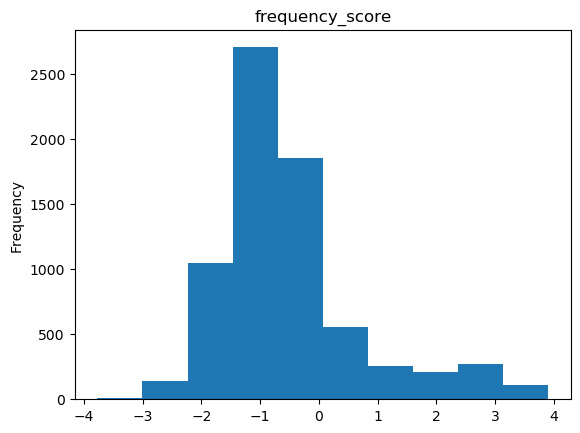

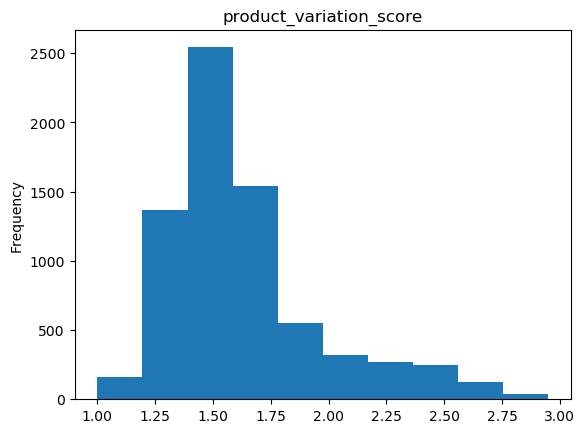

In [24]:
df['frequency_score'].plot(kind = 'hist')
plt.title('frequency_score')
plt.show()
df['product_variation_score'].plot(kind = 'hist')
plt.title('product_variation_score')
plt.show()

In [25]:
# Как видим по графикам, благодаря логарифмированию нам удалось преобразовать переменные
# и получить более приблеженный к нормальному распределению вид показателей.

In [26]:
# Outliers

In [27]:
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [28]:
# Проверяем все параметры на наличие выбросов, применив правило 3-х сигм. В случае обнаружения выброса
# заменяем его значение на гранично допустимое значение отосительно диапазона 3-х сигм.

In [29]:
df = outliers(df)
df.describe()

,visit_score,product_search_score,ctr_score,stay_score,frequency_score,product_variation_score,order_score,affinity_score
count,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000
mean,19.699517,5.382046,0.096160,0.148028,-0.531058,1.628595,3.300619,19.321448
std,6.978223,1.762445,0.179635,0.476318,1.197838,0.328125,1.022536,18.022702
min,1.248385,0.057245,-0.615134,-0.381836,-3.774134,1.000198,0.620935,-0.501215
25%,14.250243,4.155659,0.005032,-0.033167,-1.265426,1.411759,2.649115,6.910150
50%,19.256051,5.366157,0.063178,0.024754,-0.781682,1.543731,3.259527,14.630477
75%,24.756843,6.573104,0.135072,0.131196,-0.195103,1.732849,3.872039,26.102862
max,40.643182,10.714282,0.893238,2.860318,3.112183,2.628244,6.480752,82.240072


In [30]:
# По результатам статистических данных можем сделать вывод о том, что у большинства переменных мы избавились от выбросов,
# так как максимальные и минимальные значения показателей находятся в пределах 3-х сигм. 
# Максимальные и минимальные значения для ctr_score, stay_score, affinity_score стали лучше относительно начальных 
# показателей, но они выходят за пределы 3-х сигм. Это происходит потому, что данные переменные не соответсвуют 
# гауссовскому распределению, так как ранее нам не удалось провести преобразования над ними.

In [31]:
# Encoding

In [32]:
dfs = df[['customer_active_segment','X1']]
info = []
for column in dfs.columns:
        vals = {"col": column,
                "nunique": dfs[column].nunique(),
                "unique": dfs[column].unique(),
                "type": dfs[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type
0,customer_active_segment,5,"[B, C, A, AA, D]",object
1,X1,5,"[BA, AA, A, F, E]",object


In [33]:
cas = {'AA':1,'A':2,'B':3,'C':4,'D':5}
x1 = {'AA':1,'A':2,'BA':3,'E':4,'F':5}

df['customer_active_segment'] = df['customer_active_segment'].map(cas)
df['X1'] = df['X1'].map(x1)
df

,visit_score,product_search_score,ctr_score,stay_score,frequency_score,product_variation_score,order_score,affinity_score,customer_active_segment,X1
0,22.500174,3.702145,0.118811,0.093253,-0.372171,1.755587,3.748009,7.661716,3,3
1,13.225950,3.600102,0.130985,0.053575,-1.946621,1.371272,3.469659,33.999679,3,1
2,14.603376,5.084047,-0.004651,-0.036299,-1.097486,1.448015,3.855939,33.485630,3,1
3,26.149905,3.025501,0.229740,0.204591,1.326652,1.937680,2.362421,0.795372,3,3
4,19.810630,5.020400,-0.011347,-0.028780,-1.248827,1.522902,3.278624,15.052058,4,3
...,...,...,...,...,...,...,...,...,...,...
7155,18.164300,7.240835,-0.056238,-0.177289,-1.088837,1.397004,4.758199,68.052717,4,1
7156,25.363705,4.881059,0.038720,0.054397,0.897137,2.025810,1.823892,2.080245,4,3
7157,11.160720,5.019859,0.053864,-0.102337,1.603054,2.150058,2.422193,0.616082,4,3
7158,17.140020,9.269037,0.059911,-0.004299,-1.028902,1.433648,3.715392,26.939493,4,3


In [34]:
# Correlations

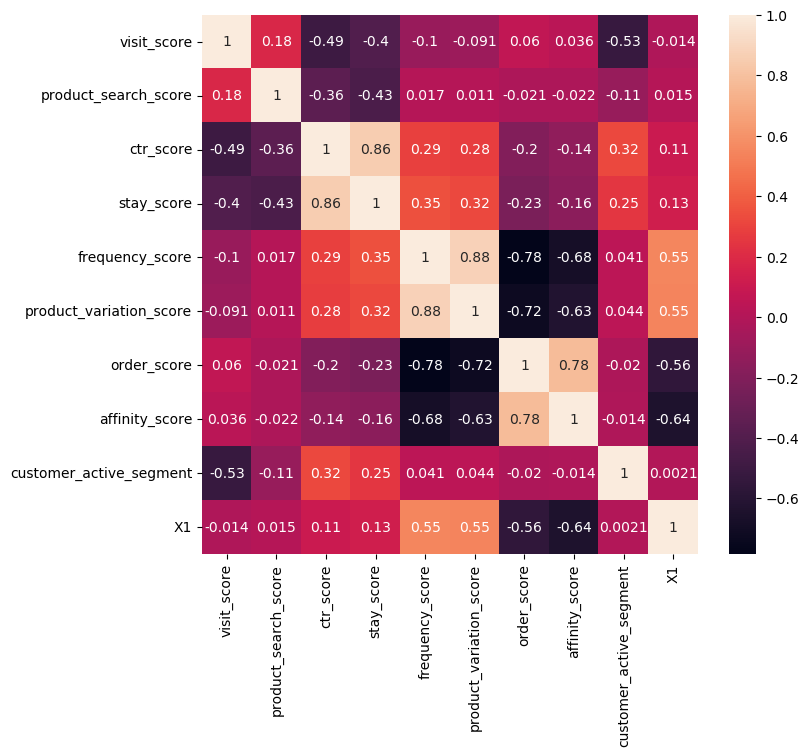

In [35]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corrmat, annot=True)
plt.show()

In [36]:
# В моем датасете объясняемой перемоенной будет order_score - количество заказов, которые были успешно доставлены 
# и не возвращены. По корреляционной таблице видно, что достаточно сильно влияют на эту переменную frequency_score
# и product_variation_score, причём корреляция отрицательная. 
# Относительно независимых переменных прослеживается сильная связь affinity_score с frequency_score,
# product_variation_score и X1. Поэтому стоит убрать этот параметр из базы данных во избежания мультиколлинеарности.

In [37]:
df.to_csv('task_prep.csv', sep=';', index=False)

In [38]:
dfr = df.drop(['affinity_score'], axis='columns', inplace=False)
dfr.shape

(7160, 9)

In [39]:
dfr.to_csv('task_prep(-1).csv', sep=';', index=False)